# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## Import Libraries

In [1]:
# Step 1. Update the PATH env var. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"
os.environ['PATH'] = f"{os.environ['PATH']}:/opt/conda/lib/python3.6/site-packages"
# Step 2. Restart the Kernel. 
# If you skip this step, your notebook may not be able to import the packages well. 

In [1]:
# Install the pinned version of packages, similar to below or use requirements.txt

!python -m pip install 'numpy==1.19.5' 'prompt-toolkit<2.0.0,>=1.0.15' 'jupyter-client>=7.0.0' 'jsonschema>=3.0.1' 'widgetsnbextension==3.0.0'

# Check the version of any specific package
!python -m pip freeze | grep numpy

!pip -q install ./python

    100% |████████████████████████████████| 13.4MB 1.2MB/s eta 0:00:01
    100% |████████████████████████████████| 133kB 21.9MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 18.0MB/s ta 0:00:01
    100% |████████████████████████████████| 2.5MB 10.2MB/s ta 0:00:01
    100% |████████████████████████████████| 92kB 19.2MB/s ta 0:00:01
  Found existing installation: numpy 1.12.1
    Uninstalling numpy-1.12.1:
      Successfully uninstalled numpy-1.12.1
  Found existing installation: jupyter-core 4.4.0
    Uninstalling jupyter-core-4.4.0:
      Successfully uninstalled jupyter-core-4.4.0


  Found existing installation: jupyter-client 5.2.4
    Uninstalling jupyter-client-5.2.4:
      Successfully uninstalled jupyter-client-5.2.4
  Found existing installation: jsonschema 2.6.0
    Uninstalling jsonschema-2.6.0:
      Successfully uninstalled jsonschema-2.6.0
  Found existing installation: widgetsnbextension 3.1.0
    Uninstalling widgetsnbextension-3.1.0:
      Successfully uninstalled widgetsnbextension-3.1.0
numpy==1.19.5
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.36 which is incompatible.


In [2]:
from unityagents import UnityEnvironment
import numpy as np
import torch
import matplotlib.pyplot as plt
from dqn_agent import Agent
from collections import deque


### 1. Start the Environment

In [3]:
#env = UnityEnvironment(file_name="/mnt/store_data/Value-based-methods/p1_navigation/Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Train the Agent

In [6]:
# Initilize the agent network with the suitable parameters.
seed=42
agent = Agent(state_size=state_size, action_size=action_size, seed=seed)

In [7]:
def dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.

    Trains a Deep Q-Network (DQN) to solve a given environment using the epsilon-greedy strategy.

    Params:
    - agent: The DQN agent responsible for interacting with the environment.
    - env: The Unity environment.
    - brain_name (str): The name of the brain associated with the environment.
    - n_episodes (int): maximum number of training episodes.
    - max_t (int): maximum number of timesteps per episode.
    - eps_start (float): starting value of epsilon for epsilon-greedy action selection.
    - eps_end (float): minimum value of epsilon.
    - eps_decay (float): multiplicative factor (per episode) for decreasing epsilon.

    Returns:
    - scores (list): list containing scores from each episode.
    """

    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    epsilon = eps_start                    # initialize epsilon

    for i_episode in range(1, n_episodes + 1):
        
        # Modified for the environment, as shown in the example
        env_info = env.reset(train_mode=True)[brain_name]  # reset the environment
        state = env_info.vector_observations[0]            # get the current state        
        score = 0                                          # initialize the score

        for _ in range(max_t):
            action = agent.act(state, epsilon)                # select an action
            env_info = env.step(action)[brain_name]       # send the action to the environment
            
            next_state = env_info.vector_observations[0]  # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                 # see if the episode has finished
            
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            
            if done:
                break 

        scores_window.append(score)       # save the most recent score
        scores.append(score)              # save the most recent score
        epsilon = max(eps_end, eps_decay * epsilon)  # decrease epsilon
        
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            
        if np.mean(scores_window) >= 13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode - 100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
        
    # Close the environment after finishing the training.
    env.close()
    print("Last score: {}".format(score))
    
    return scores


In [8]:
# Example of using the DQN function to train an agent on the given environment
# and retrieve the scores achieved during training.

# The 'agent', 'env', and 'brain_name' are previously defined.

# Train the agent using the DQN function with specified parameters.
scores = dqn(agent, env, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995)


Episode 100	Average Score: 1.01
Episode 200	Average Score: 4.26
Episode 300	Average Score: 7.58
Episode 400	Average Score: 10.88
Episode 477	Average Score: 13.01
Environment solved in 377 episodes!	Average Score: 13.01
Scores: 17.0


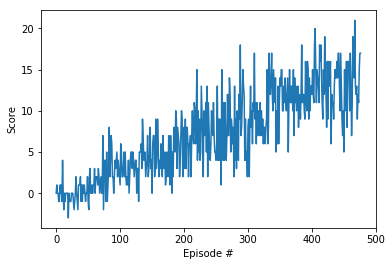

In [9]:
# Create a figure and axis for plotting
fig = plt.figure()
ax = fig.add_subplot(111)

# Plot the scores over episodes
plt.plot(np.arange(len(scores)), scores)

# Set labels for the axes
plt.ylabel('Score')
plt.xlabel('Episode #')

# Save the plot as an image file
plt.savefig('dqn_scores.png', bbox_inches='tight')

# Show the plot
plt.show()